In [1]:
!huggingface-cli download dodofk/ntusldl2024_miniproject_2 --repo-type dataset --local-dir /content/ntusldl2024_miniproject_2

Fetching 8 files:   0% 0/8 [00:00<?, ?it/s]Downloading 'README.md' to '/content/ntusldl2024_miniproject_2/.cache/huggingface/download/README.md.37b5bb4f454ba0f4030ac0cf2202061f118e27be.incomplete'

label_description.txt: 100% 2.74k/2.74k [00:00<00:00, 16.6MB/s]
Download complete. Moving file to /content/ntusldl2024_miniproject_2/label_description.txt

README.md:   0% 0.00/524 [00:00<?, ?B/s]

label_to_idx.txt: 100% 543/543 [00:00<00:00, 2.83MB/s]
README.md: 100% 524/524 [00:00<00:00, 469kB/s]

.gitattributes: 100% 2.46k/2.46k [00:00<00:00, 20.5MB/s]
Download complete. Moving file to /content/ntusldl2024_miniproject_2/label_to_idx.txt
Download complete. Moving file to /content/ntusldl2024_miniproject_2/README.md
Download complete. Moving file to /content/ntusldl2024_miniproject_2/.gitattributes
Fetching 8 files:  12% 1/8 [00:00<00:01,  4.85it/s]
test_data_public.csv:   0% 0.00/122k [00:00<?, ?B/s]

train_data.csv:   0% 0.00/944k [00:00<?, ?B/s]Downloading 'train_data.tar.gz' to '/conten

In [2]:
import torch
print(torch.cuda.is_available())


True


In [3]:
import tarfile

# 解壓縮 train_data.tar.gz
train_tar_path = '/content/ntusldl2024_miniproject_2/train_data.tar.gz'
train_extract_path = '/content/ntusldl2024_miniproject_2/train_data'

with tarfile.open(train_tar_path, 'r:gz') as tar:
    tar.extractall(path=train_extract_path)
    print(f"Train data extracted to {train_extract_path}")

# 解壓縮 test_data.tar.gz
test_tar_path = '/content/ntusldl2024_miniproject_2/test_data.tar.gz'
test_extract_path = '/content/ntusldl2024_miniproject_2/test_data'

with tarfile.open(test_tar_path, 'r:gz') as tar:
    tar.extractall(path=test_extract_path)
    print(f"Test data extracted to {test_extract_path}")


Train data extracted to /content/ntusldl2024_miniproject_2/train_data
Test data extracted to /content/ntusldl2024_miniproject_2/test_data


In [4]:
import os

# 列出訓練數據目錄中的文件
print("Files in train data directory:")
print(os.listdir(train_extract_path))

# 列出測試數據目錄中的文件
print("Files in test data directory:")
print(os.listdir(test_extract_path))


Files in train data directory:
['train_data']
Files in test data directory:
['test_data']


In [5]:
import pandas as pd

# 確保解壓縮文件所在的目錄
train_df_path = '/content/ntusldl2024_miniproject_2/train_data.csv'
test_df_path = '/content/ntusldl2024_miniproject_2/test_data_public.csv'
label_2_idx_path = '/content/ntusldl2024_miniproject_2/label_to_idx.txt'

# 讀取 CSV 文件
train_df = pd.read_csv(train_df_path)
test_df = pd.read_csv(test_df_path)
label_2_idx = pd.read_csv(label_2_idx_path, header=None, index_col=0, sep=' ')

label_2_idx = label_2_idx.squeeze().to_dict()

print("Train DataFrame:")
print(train_df.head())

print("Test DataFrame:")
print(test_df.head())

print("Label to Index Mapping:")
print(label_2_idx)


Train DataFrame:
      filename         labels
0  train_0.jpg            01G
1  train_1.jpg       10A, 10G
2  train_2.jpg       12A, 11A
3  train_3.jpg       11A, 12A
4  train_4.jpg  12F, 12C, 11B
Test DataFrame:
     filename
0  test_0.jpg
1  test_1.jpg
2  test_2.jpg
3  test_3.jpg
4  test_4.jpg
Label to Index Mapping:
{'01A': 0, '01B': 1, '01C': 2, '01D': 3, '01E': 4, '01F': 5, '01G': 6, '01H': 7, '02A': 8, '02B': 9, '02C': 10, '02D': 11, '02E': 12, '02F': 13, '02G': 14, '02H': 15, '03A': 16, '03B': 17, '03C': 18, '03D': 19, '03E': 20, '04A': 21, '04B': 22, '04C': 23, '04D': 24, '05A': 25, '05B': 26, '05C': 27, '05D': 28, '06A': 29, '06B': 30, '06C': 31, '06D': 32, '06F': 33, '06H': 34, '06I': 35, '06M': 36, '06O': 37, '06P': 38, '06Q': 39, '06R': 40, '06T': 41, '06U': 42, '06V': 43, '06Z': 44, '07A': 45, '07B': 46, '07C': 47, '07D': 48, '08D': 49, '08E': 50, '08F': 51, '09A': 52, '09C': 53, '09F': 54, '10A': 55, '10B': 56, '10C': 57, '10D': 58, '10E': 59, '10F': 60, '10G': 61, '11A':

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
import torch

torch.cuda.empty_cache()


In [8]:
%%time
from torchvision import transforms
from PIL import Image

# 影像前處理 - 訓練階段
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 影像前處理 - 測試階段
test_transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

CPU times: user 3.24 s, sys: 251 ms, total: 3.49 s
Wall time: 4.1 s


In [9]:
import os
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision import transforms
import numpy as np

train_data_dir = '/content/ntusldl2024_miniproject_2/train_data/train_data'
test_data_dir = '/content/ntusldl2024_miniproject_2/test_data/test_data'


# 自定義數據集類
class CustomDataset(Dataset):
    def __init__(self, df, data_dir, transform=None, label_dict=None, is_test=False):
        self.df = df
        self.data_dir = data_dir
        self.transform = transform
        self.label_dict = label_dict
        self.is_test = is_test  # 是否為測試模式

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # 提取圖像路徑
        img_name = self.df.loc[idx, 'filename'].strip()  # 確保去除多餘空格
        img_path = f"{self.data_dir}/{img_name}"
        if not os.path.exists(img_path):
            raise FileNotFoundError(f"File {img_path} does not exist!")
        image = Image.open(img_path).convert('RGB')

        # 測試數據不需要標籤
        if self.is_test:
            if self.transform:
                image = self.transform(image)
            return image, img_name  # 測試數據返回圖像和文件名

        # 處理訓練或驗證數據的標籤
        labels = self.df.loc[idx, 'labels'].split(',')  # 假設標籤用逗號分隔
        label_array = np.zeros(len(self.label_dict))
        for label in labels:
            label = label.strip()
            try:
                label_idx = self.label_dict[label]
                label_array[label_idx] = 1.0
            except KeyError:
                print(f"Warning: Label {label} not found in label_dict!")

        if self.transform:
            image = self.transform(image)

        return image, label_array.astype('float32')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

# 假设 train_df 和 test_df 是 DataFrame，包含 'filename' 和 'labels'
train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

# 自定义数据集
train_dataset = CustomDataset(train_df, train_data_dir, transform=train_transform, label_dict=label_2_idx, is_test=False)
valid_dataset = CustomDataset(valid_df, train_data_dir, transform=valid_transform, label_dict=label_2_idx, is_test=False)
test_dataset = CustomDataset(test_df, test_data_dir, transform=test_transform, label_dict=label_2_idx, is_test=True)

# 数据加载器
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=False)

# 打印数据集大小
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(valid_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")


Train dataset size: 30292
Validation dataset size: 7574
Test dataset size: 8784


In [10]:
%%time
from torchvision import models
import torch.nn as nn
import torch.optim as optim

model = models.efficientnet_b3(pretrained=True)
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 79)  # 修改輸出層
model = model.to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-b3899882.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-b3899882.pth
100%|██████████| 47.2M/47.2M [00:00<00:00, 194MB/s]


CPU times: user 499 ms, sys: 225 ms, total: 724 ms
Wall time: 961 ms


In [11]:
import torch.optim as optim
from sklearn.metrics import average_precision_score, accuracy_score
import numpy as np
import copy
from datetime import datetime

# 計算時間戳
current_time = datetime.now()
print("現在時間:", current_time)

best_model_wts = copy.deepcopy(model.state_dict())
def train_one_epoch(model, criterion, optimizer, data_loader, device):
    """單輪訓練"""
    model.train()
    running_loss = 0.0
    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(data_loader.dataset)
    return epoch_loss


def validate_model(model, criterion, data_loader, device, label_threshold=0.5):
    """驗證模型"""
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_outputs = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            all_labels.append(labels.cpu().numpy())
            all_outputs.append(outputs.cpu().numpy())

    all_labels = np.concatenate(all_labels, axis=0)
    all_outputs = np.concatenate(all_outputs, axis=0)

    # 計算 mAP 和 Accuracy
    mAP = average_precision_score(all_labels, all_outputs, average='macro')
    binary_outputs = (all_outputs > label_threshold).astype(int)
    accuracy = accuracy_score(all_labels, binary_outputs)
    epoch_loss = running_loss / len(data_loader.dataset)
    return epoch_loss, mAP, accuracy


def train_model(model, criterion, optimizer, scheduler, train_loader, valid_loader, device, num_epochs=25, patience=5):
    """完整訓練流程"""
    best_model_wts = copy.deepcopy(model.state_dict())
    best_mAP = 0.0
    patience_counter = 0

    train_loss_history = []
    valid_loss_history = []
    valid_map_history = []
    valid_accuracy_history = []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch}/{num_epochs - 1}")
        print("-" * 10)
        current_time = datetime.now()
        print("現在時間:", current_time)

        # 訓練一個 epoch
        train_loss = train_one_epoch(model, criterion, optimizer, train_loader, device)
        train_loss_history.append(train_loss)

        # 驗證模型
        valid_loss, mAP, accuracy = validate_model(model, criterion, valid_loader, device)
        valid_loss_history.append(valid_loss)
        valid_map_history.append(mAP)
        valid_accuracy_history.append(accuracy)

        # 更新學習率
        if scheduler is not None:
            scheduler.step()

        print(f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}, mAP: {mAP:.4f}, Accuracy: {accuracy:.4f}")

        # 保存最佳模型
        if mAP > best_mAP:
            best_mAP = mAP
            best_model_wts = copy.deepcopy(model.state_dict())
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    # 加載最佳模型
    model.load_state_dict(best_model_wts)
    return model, train_loss_history, valid_loss_history, valid_map_history, valid_accuracy_history


# 訓練模型
model, train_loss, valid_loss, valid_map, valid_accuracy = train_model(
    model,
    criterion,
    optimizer,
    scheduler,
    train_loader,
    valid_loader,  # 注意驗證集數據加載器需設置
    device,
    num_epochs=50
)

# 保存訓練記錄
training_log = {
    "train_loss": train_loss,
    "valid_loss": valid_loss,
    "valid_map": valid_map,
    "valid_accuracy": valid_accuracy,
}
np.save("training_log.npy", training_log)

print("訓練完成，模型已保存。")


現在時間: 2024-12-25 11:36:44.569345
Epoch 0/49
----------
現在時間: 2024-12-25 11:36:44.660261
Train Loss: 0.0935, Valid Loss: 0.0681, mAP: 0.1808, Accuracy: 0.0989
Epoch 1/49
----------
現在時間: 2024-12-25 11:42:50.017251
Train Loss: 0.0665, Valid Loss: 0.0583, mAP: 0.2985, Accuracy: 0.1992
Epoch 2/49
----------
現在時間: 2024-12-25 11:49:00.655410
Train Loss: 0.0591, Valid Loss: 0.0524, mAP: 0.3664, Accuracy: 0.2378
Epoch 3/49
----------
現在時間: 2024-12-25 11:55:10.233414
Train Loss: 0.0541, Valid Loss: 0.0491, mAP: 0.4220, Accuracy: 0.2894
Epoch 4/49
----------
現在時間: 2024-12-25 12:01:20.467558
Train Loss: 0.0501, Valid Loss: 0.0468, mAP: 0.4539, Accuracy: 0.3195
Epoch 5/49
----------
現在時間: 2024-12-25 12:07:29.828680
Train Loss: 0.0466, Valid Loss: 0.0456, mAP: 0.4780, Accuracy: 0.3458
Epoch 6/49
----------
現在時間: 2024-12-25 12:13:39.411171
Train Loss: 0.0434, Valid Loss: 0.0440, mAP: 0.4939, Accuracy: 0.3676
Epoch 7/49
----------
現在時間: 2024-12-25 12:19:50.250999
Train Loss: 0.0411, Valid Loss: 0.043

In [ ]:
print(train_df.columns)


Index(['filename', 'labels'], dtype='object')


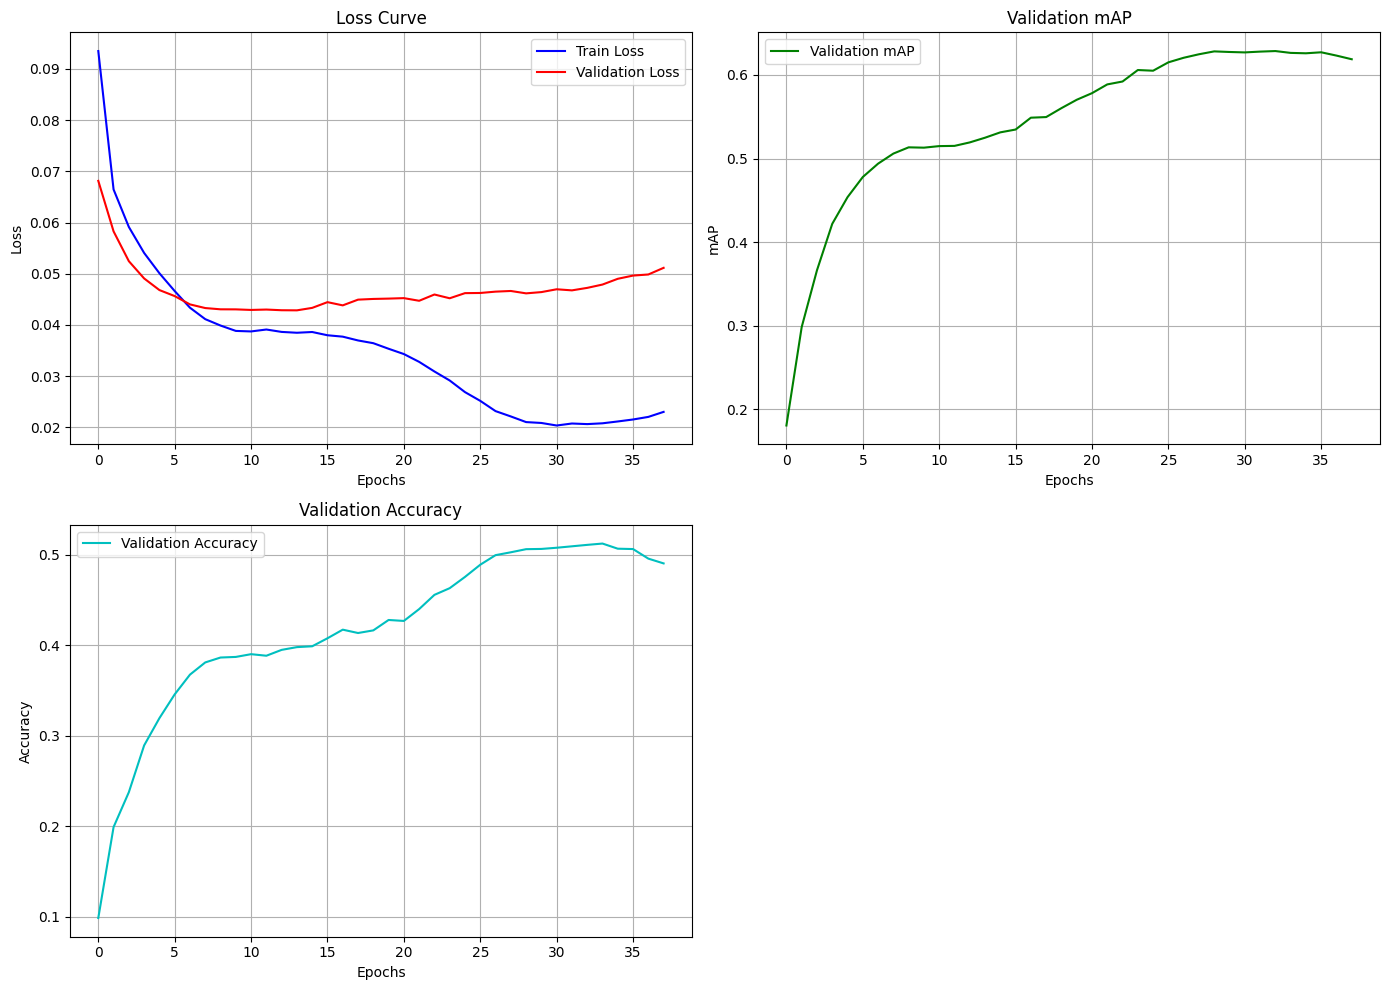

In [12]:
# 畫出訓練和驗證損失、mAP和準確度的線圖
import matplotlib.pyplot as plt

epochs = range(len(train_loss))
plt.figure(figsize=(14, 10))

# 損失曲線
plt.subplot(2, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Train Loss')
plt.plot(epochs, valid_loss, 'r', label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# mAP 曲線
plt.subplot(2, 2, 2)
plt.plot(epochs, valid_map, 'g', label='Validation mAP')
plt.title('Validation mAP')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.grid(True)
plt.legend()

# 準確度曲線
plt.subplot(2, 2, 3)
plt.plot(epochs, valid_accuracy, 'c', label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
model.eval()

# 測試數據的影像前處理
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 測試數據集的定義
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, metadata_path, data_dir, transform=None):
        self.metadata = pd.read_csv(metadata_path, sep='\t')
        self.data_dir = data_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        filename = self.metadata.iloc[idx, 0]
        img_path = os.path.join(self.data_dir, filename)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return filename, image

# 測試數據目錄和元數據
test_data_dir = '/content/ntusldl2024_miniproject_2/test_data/test_data'
test_metadata_path = '/content/ntusldl2024_miniproject_2/test_data_public.csv'
output_csv = 'test_efficient_old.csv'

# 測試數據集和數據加載器
test_dataset = TestDataset(test_metadata_path, test_data_dir, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# 預測並生成 CSV
results = []
with torch.no_grad():
    for filenames, images in test_loader:
        images = images.to(device)
        outputs = model(images)
        probs = torch.sigmoid(outputs).cpu().numpy()
        for filename, prob in zip(filenames, probs):
            results.append([filename] + prob.tolist())

# 保存結果到 CSV
columns = ['filename'] + [f'class_{i}' for i in range(79)]
df = pd.DataFrame(results, columns=columns)
df.to_csv(output_csv, index=False)

print(f"測試完成，結果已保存到 '{output_csv}'。")

測試完成，結果已保存到 'test_efficient_old.csv'。


In [14]:
current_time = datetime.now()

print("現在時間:", current_time)

現在時間: 2024-12-25 15:32:14.562844
